# **1.Problem Statements**

Property prices are influenced by a variety of factors, including house size, location, age, and overall condition. Accurate estimation of property prices is crucial for buyers, sellers, real estate companies, and financial institutions. However, manual pricing methods are often subjective and can result in inaccurate valuations, leading to poor decision-making.

The objective of this project is to develop a regression-based machine learning model that predicts property prices using historical housing data. Additionally, the project aims to identify the key factors that have the greatest impact on house prices.

# **2. Objectives of the Project**


*  Analyze and understand patterns in property price
*  Perform essential data preprocessing and cleaning


*   Conduct meaningful Exploratory Data Analysis (EDA) to uncover insights
*   Develop regression-based machine learning models for price prediction



*   Evaluate model performance using appropriate regression metrics
*   Identify the key features that significantly influence property prices




## **3. Dataset Description**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [40]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [41]:
df.shape

(1460, 81)

In [42]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


## **4. Exploratory Data Analysis (EDA) - Minimal Graphs**

**Graph 1: Price distribution** **bold text**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


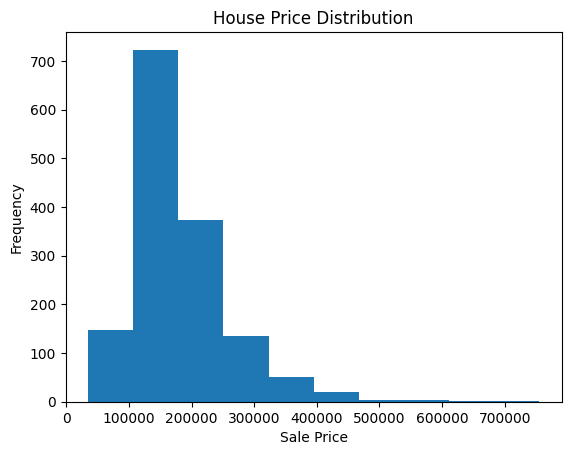

In [44]:
plt.figure()
plt.hist(df['SalePrice'], bins=10)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('House Price Distribution')
plt.show()

**Graph 2: House Size and Price**

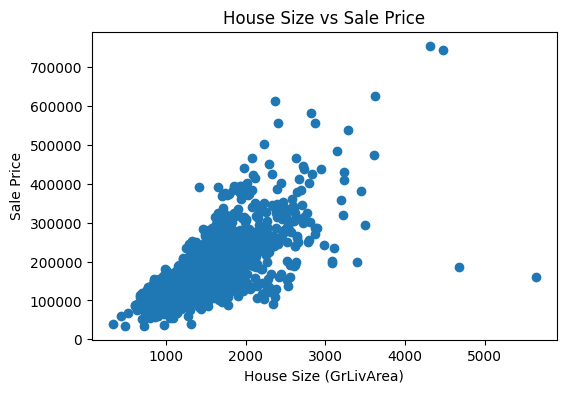

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('House Size (GrLivArea)')
plt.ylabel('Sale Price')
plt.title('House Size vs Sale Price')
plt.show()

**Graph 3: Price by Location**

<Figure size 1200x600 with 0 Axes>

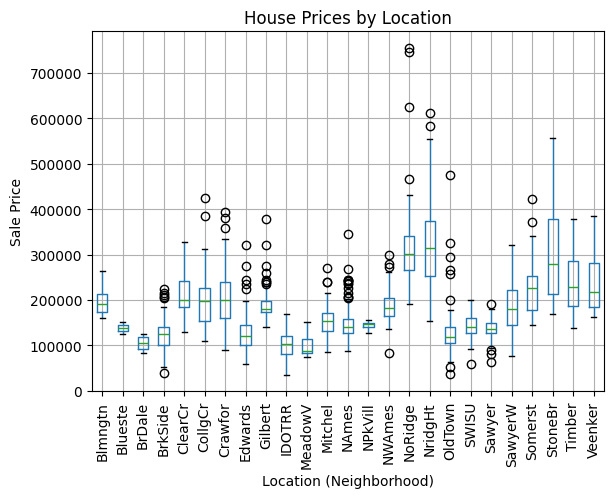

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.boxplot(column='SalePrice', by='Neighborhood', rot=90)
plt.xlabel('Location (Neighborhood)')
plt.ylabel('Sale Price')
plt.title('House Prices by Location')
plt.suptitle('')  # removes automatic subtitle
plt.show()

In [47]:
# Create property age
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

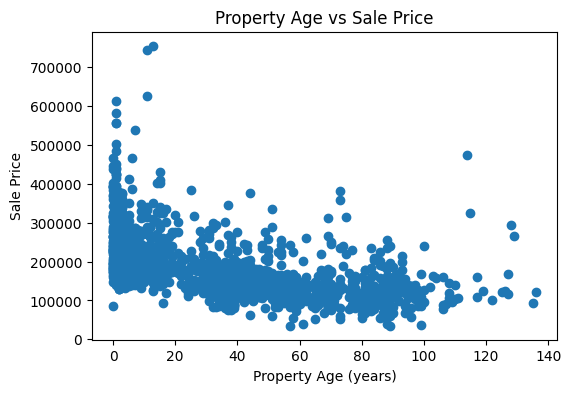

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['PropertyAge'], df['SalePrice'])
plt.xlabel('Property Age (years)')
plt.ylabel('Sale Price')
plt.title('Property Age vs Sale Price')
plt.show()

## **5. Machine learning WorkFlow**

Load The dataset

In [49]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Handle missing values

In [50]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())

print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [51]:
le = LabelEncoder()

df['Neighborhood_encoded'] = le.fit_transform(df['Neighborhood'])
df['OverallCond_encoded'] = le.fit_transform(df['OverallCond'])
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...   NaN         NaN       0      2   2008       WD   
1         Lvl    AllPub  ...   NaN         NaN       0      5   2007       WD   
2         Lvl    AllPub  ...   NaN         NaN       0      9   2008       WD   
3         Lvl    AllPub  ...   NaN         NaN       0      2   2006       WD   
4         Lvl    AllPub  ...   NaN         NaN       0     12   2008       WD   

  SaleCondition  SalePrice  Neighborhood_encoded  OverallCond_encode

**Scale  features**

In [52]:
df['Age'] = df['YrSold'] - df['YearBuilt']
X = df[['LotArea', 'LotFrontage', 'GrLivArea', 'Age', 'OverallQual', 'OverallCond_encoded', 'Neighborhood_encoded']]
y = df['SalePrice']

**Split data into training and testing sets**

In [53]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=42
)

#   **6. Models Used**

**Linear Regression**

In [54]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

**Decision Tree**

In [55]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

**Accuracy**

In [56]:
accuracy=accuracy_score(y_train,y_train)
print("Accuracy:",accuracy)

Accuracy: 1.0


**Random Forest**

In [65]:
feature_importance = rf.feature_importances_

features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

In [66]:
rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

 ***7.Model Evolution***

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

#RMSE
rmse=np.sqrt(mean_squared_error(y,y_pred))
print("RMSE:",rmse)

#R2 Score
r2=r2_score(y,y_pred)
print("R2_score:",r2)

# 8.Identifing Price Influencing-Factors

In [ ]:
importances  = rf.feature_importances_
features = X.columns

import matplotlib.pyplot as plt
plt.figure()
plt.bar(features,importances)
plt.xlabel=("Features Importance-Random Forest")
plt.ylabel=("Importances Score")
plt.xticks(rotation=45)
plt.show()